# <font color='dark'>**Detecção de texto em placas de carro**</h1>

# <font color='dark'>**Aula 5**</h1>


### Importação das bibliotecas

In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

### Leitura da imagem

In [2]:
img_names = ['trecho_livro', 'placa_carro1', 'placa_carro2', 'placa_carro3']

In [4]:
img = cv2.imread(f'./data/{img_names[3]}.jpg')

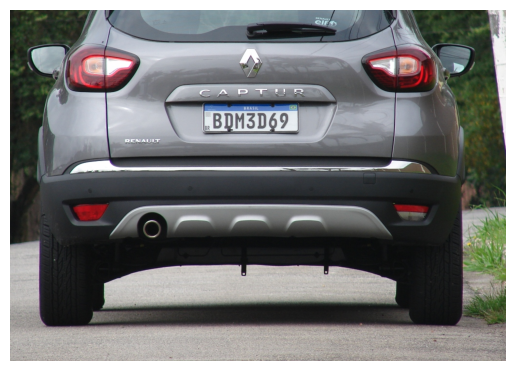

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

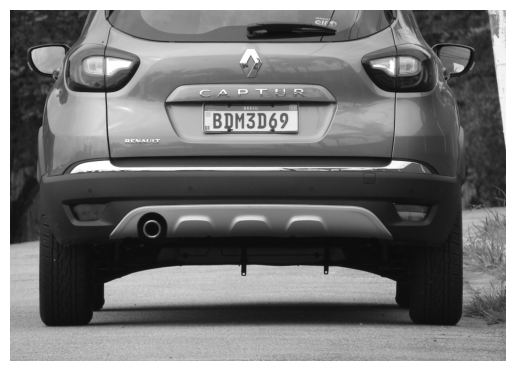

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

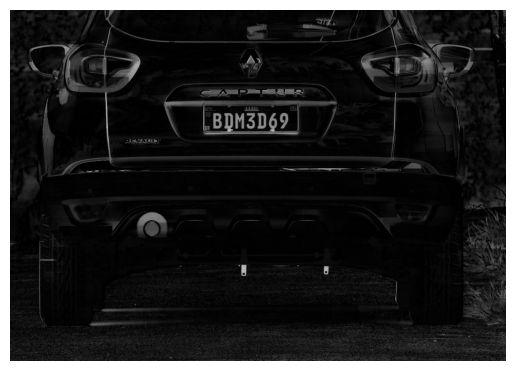

In [7]:
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel_rect)

plt.imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Reconhecimento automatizado

- [Documentação OpenCV: Sobel](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

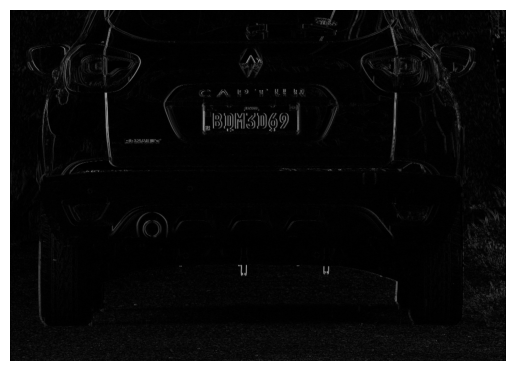

In [8]:
import numpy as np

sobel_x = cv2.Sobel(blackhat, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = 1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')

plt.imshow(cv2.cvtColor(sobel_x, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- [Documentação OpenCV: GaussianBlur](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

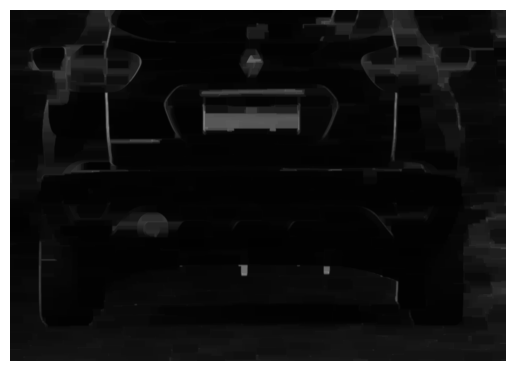

In [9]:
sobel_x = cv2.GaussianBlur(sobel_x, (5,5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_rect)

plt.imshow(cv2.cvtColor(sobel_x, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

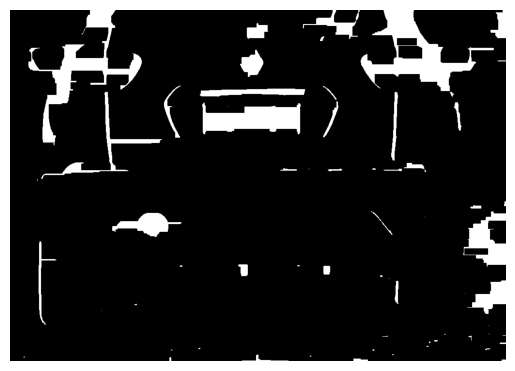

In [10]:
value, threshold = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

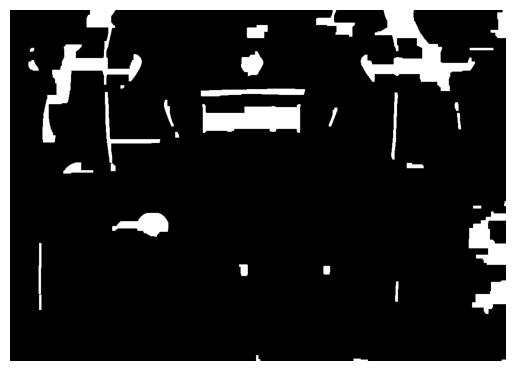

In [11]:
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
threshold = cv2.erode(threshold, kernel_rect, iterations=2)
threshold = cv2.dilate(threshold, kernel_rect, iterations=2)

plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

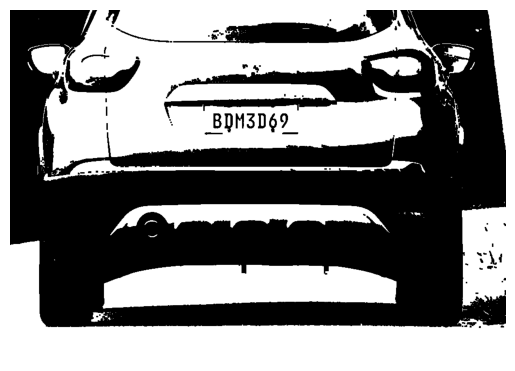

In [12]:
cloase_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_rect)
value, mask = cv2.threshold(cloase_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- [Documentação OpenCV: Bitwise and](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)

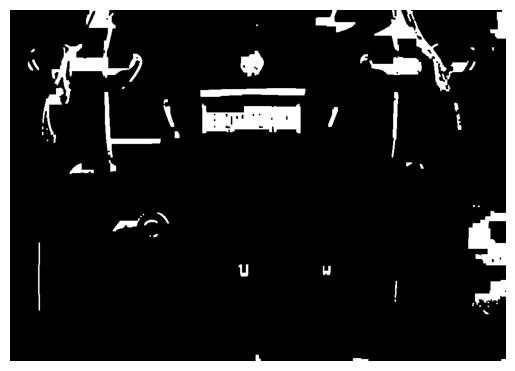

In [13]:
threshold = cv2.bitwise_and(threshold, threshold, mask=mask)
threshold = cv2.dilate(threshold, kernel_rect, iterations=2)
threshold = cv2.erode(threshold, kernel_rect)

plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

- [Documentação Scikit image: Clear Border](https://scikit-image.org/docs/dev/api/skimage.segmentation.html?highlight=clear+border#skimage.segmentation.clear_border)

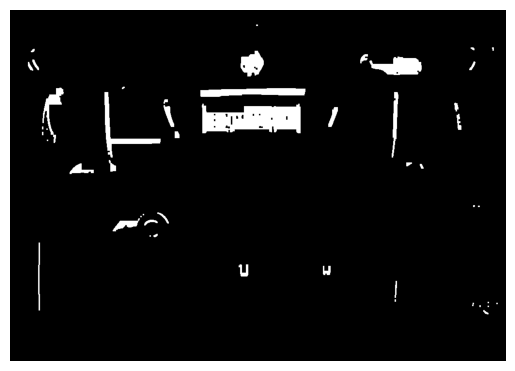

In [14]:
from skimage.segmentation import clear_border

threshold = clear_border(threshold)

plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [15]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
contours

[array([[[397, 195]],
 
        [[397, 197]],
 
        [[396, 198]],
 
        [[396, 202]],
 
        [[397, 203]],
 
        [[397, 255]],
 
        [[403, 255]],
 
        [[405, 253]],
 
        [[405, 252]],
 
        [[406, 251]],
 
        [[446, 251]],
 
        [[448, 253]],
 
        [[450, 253]],
 
        [[450, 249]],
 
        [[451, 248]],
 
        [[453, 248]],
 
        [[454, 249]],
 
        [[454, 253]],
 
        [[458, 253]],
 
        [[460, 251]],
 
        [[463, 251]],
 
        [[463, 248]],
 
        [[464, 247]],
 
        [[534, 247]],
 
        [[535, 248]],
 
        [[535, 252]],
 
        [[537, 252]],
 
        [[538, 253]],
 
        [[540, 253]],
 
        [[540, 242]],
 
        [[541, 241]],
 
        [[543, 241]],
 
        [[544, 242]],
 
        [[544, 247]],
 
        [[545, 248]],
 
        [[545, 253]],
 
        [[548, 253]],
 
        [[549, 252]],
 
        [[549, 251]],
 
        [[550, 250]],
 
        [[550, 248]],
 
        [[551, 2

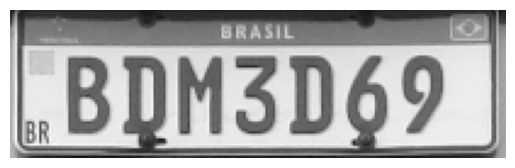

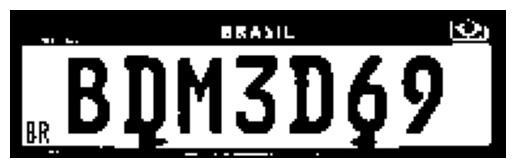

In [16]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    proportion = float(w)/h
    if proportion >= 3 and proportion <= 3.5:
        plate = img[y:y+h, x:x+w]
        value, region_interest = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        region_interest = clear_border(region_interest)
        plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        plt.imshow(cv2.cvtColor(region_interest, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

In [17]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(region_interest, lang='por', config=config_tesseract)
print(text)

.BDM3D69



In [18]:
import re
extracted_text = re.search('\w{3}\d{1}\w{1}\d{2}', text)
extracted_text

<re.Match object; span=(1, 8), match='BDM3D69'>

Regex para o texto da placa: \w{3}\d{1}\w{1}\d{2}

In [19]:
print(extracted_text.group(0))

BDM3D69
